# HR Analytics Analyzing Employee Turnover & Retention at Neotech Corporation




    

**Business Problem**

Over the past two years, we have noticed a steady increase in employee turnover rate at NeoTech Corporation. This trend has not only resulted in significant recruitment costs but has also led to a loss of skilled talent, and this is costing the company millions of dollars each year.
The HR department suspects a number of factors that are contributing to the high turnover rate. One of which is that the company is located in a highly competitive job market. Another factor could be because the environment is very demanding and employees are often required to work long hours and meet tight deadlines.
The high turnover rate is having a negative impact on NeoTech Corporation's business. It is costing the company money to recruit and train new employees, and it is also disrupting the company's operations.
ations.

**Rationale for the Project**
Analyzing employee turnover and retention can help NeoTech Corporation to identify the root causes of its high turnover rate and to develop strategies to address these issues. By understanding why employees are leaving the company, NeoTech Corporation can Identify patterns and trends among employees who leave, and also take steps to make the company a more attractive and rewarding place to work.work.

**Project Objectives**
The aim of this project is to identify the possible factors contributing to high employee turnover and recommend retention strategies based on insights drawn from the data.


In [1]:
#Importation of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load Dataset into a Dataframe
hr_df=pd.read_excel(r"C:\Users\ndibe\Desktop\Amdari\HR Analytics Analyzing Employee Turnover & Retention\HR_Employee_Data.xlsx")

In [3]:
hr_df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Department,salary,Training_Last_Year
0,EMP02438,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,EMP28133,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,EMP07164,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,EMP30478,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,EMP24003,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [4]:
hr_df.sample(10)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Department,salary,Training_Last_Year
5586,EMP05343,0.81,0.99,2,156,5,0,0,0,sales,medium,0
10010,EMP29245,0.85,0.66,5,189,3,0,0,0,sales,medium,1
10839,EMP32262,0.90,0.67,2,229,4,0,0,0,sales,low,0
7829,EMP04118,0.88,0.89,5,189,2,0,0,0,technical,medium,0
8332,EMP32897,0.60,0.57,3,203,2,0,0,0,sales,low,0
9526,EMP31699,0.45,0.87,2,268,4,1,0,0,IT,low,0
5535,EMP02717,0.95,0.81,4,238,2,0,0,0,technical,low,0
3719,EMP11688,0.57,0.45,3,189,2,0,0,0,technical,medium,0
10857,EMP31253,0.60,0.96,4,220,3,1,0,1,sales,medium,1
7633,EMP38467,0.60,0.77,3,202,3,0,0,0,sales,low,0


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   Commute_time           14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
 11  Training_Last_Year     14999 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [6]:
#1. Check for null values
hr_df.isnull().sum()


Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
Commute_time             0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
Training_Last_Year       0
dtype: int64

In [7]:
hr_df.shape

(14999, 12)

In [8]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Training_Last_Year
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.027202
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.162676
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Check for duplicates
hr_df.duplicated().sum()

0

In [10]:
hr_df.nunique()

Emp_Id                   14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
Commute_time                 8
Work_accident                2
left                         2
promotion_last_5years        2
Department                  10
salary                       3
Training_Last_Year           2
dtype: int64

In [11]:
hr_df.Department.value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [12]:
hr_df.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [13]:
#Create copy of Data frame
df=hr_df.copy()

## Exploratory Data Analysis

## Univariate Exploration

In [14]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Department,salary,Training_Last_Year
0,EMP02438,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,EMP28133,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,EMP07164,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,EMP30478,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,EMP24003,0.37,0.52,2,159,3,0,1,0,sales,low,0


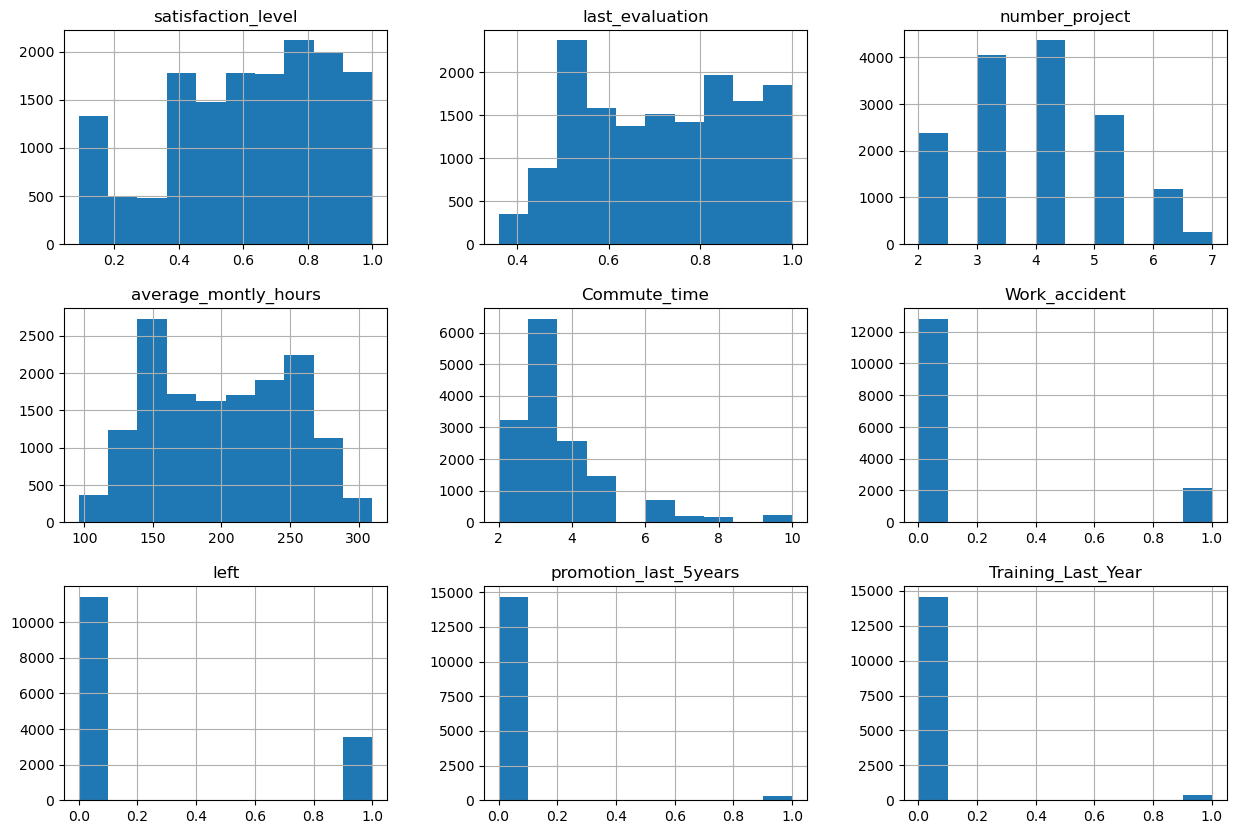

In [15]:
df.hist(figsize=(15,10));

### How does employee satisfaction vary across the dataset?

In [16]:
#Employee satisfaction level statistics
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

#### Satisfaction score statistical summary

* The dataset represents a range of employee satisfaction levels, with most scores falling between 44% and 82%. The average satisfaction level is 61.3%, indicating a moderate level of overall satisfaction.
* The scores have a moderate spread, with a standard deviation of approximately 0.249.
* The lowest satisfaction score is 9% (0,09), while the highest is 100% (1.0).
  

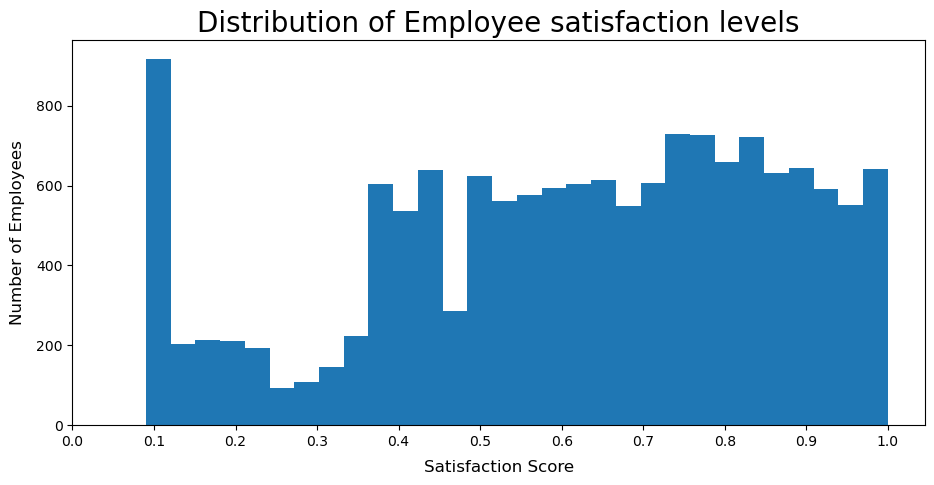

In [17]:
#histogram of satisfaction_level
plt.figure(figsize=[11,5]) #Sets the image size
bins = 30

plt.hist(x=df.satisfaction_level, bins=bins)

#Set the x-axis ticks to be from 0.1 to 1 with a specified number of ticks (10 ticks)
tick_values = np.arange(0, 1.1, 0.1)
plt.xticks(tick_values)

plt.title ('Distribution of Employee satisfaction levels', fontsize=20)
plt.xlabel ('Satisfaction Score', labelpad=8, fontsize=12)
plt.ylabel ('Number of Employees', labelpad=8, fontsize=12)

plt.show()

* The shape of the histogram looks multimodal with the data having more than 2 Peaks. The histogram being multimodal suggests that there are multiple distinct groups or patterns with satisfaction levels among employees. This could be indicative of differing experiences or conditions within the organization that affect employee satisfaction.
* The histogram shows that over 800 employees have satisfaction scores of less than 15%. This large group of highly dissatisfied employees might indicate systemic issues or specific areas of the organization that are underperforming in terms of employee satisfaction.
* The peak around 40%, representing a group with satisfaction scores between 35-46% suggests another distinct category of employees. This group is not as dissatisfied as the first one, but not fully satisfied either.


### How does employee last performance evaluation vary across the dataset?

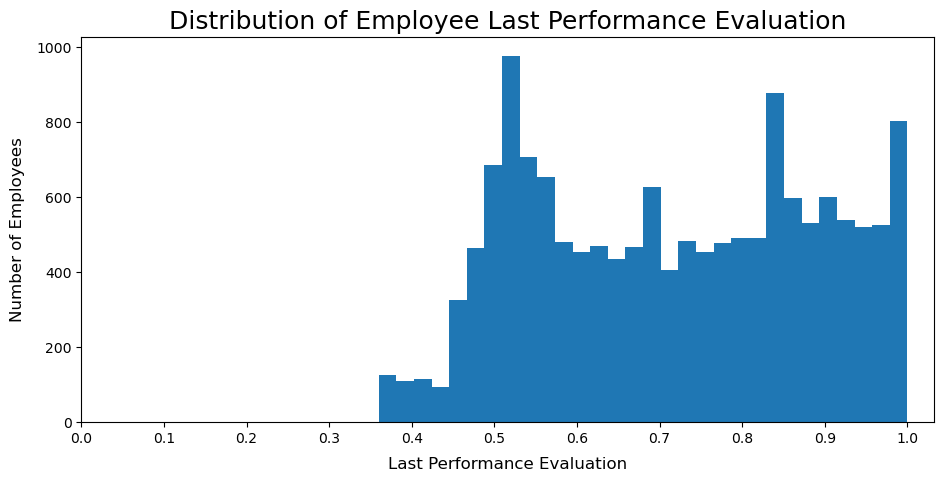

In [18]:
#histogram of satsfaction_level
plt.figure(figsize=[11,5]) #Sets the image size
bins=30

plt.hist(x=df.last_evaluation, bins=bins)

#Set the x-axis ticks to be from 0.1 to 1 with a specified number of ticks (10 ticks)
tick_values = np.arange(0, 1.1, 0.1)
plt.xticks(tick_values)

plt.title ('Distribution of Employee Last Performance Evaluation', fontsize=18)
plt.xlabel ('Last Performance Evaluation', labelpad=8, fontsize=12)
plt.ylabel ('Number of Employees', labelpad=8, fontsize=12)

plt.show()

In [19]:
#Employee Last Evaluation Statistics
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

The evaluations are fairly distributed, with a slight skew towards higher ratings. A large proportion of employees have performance evaluations between 50% and 100%, with peak around 50% and 85%.

### How does the average monthly hours worked by employees vary across the dataset?

In [20]:
#Employee Average Monthly Hours Statistics
df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

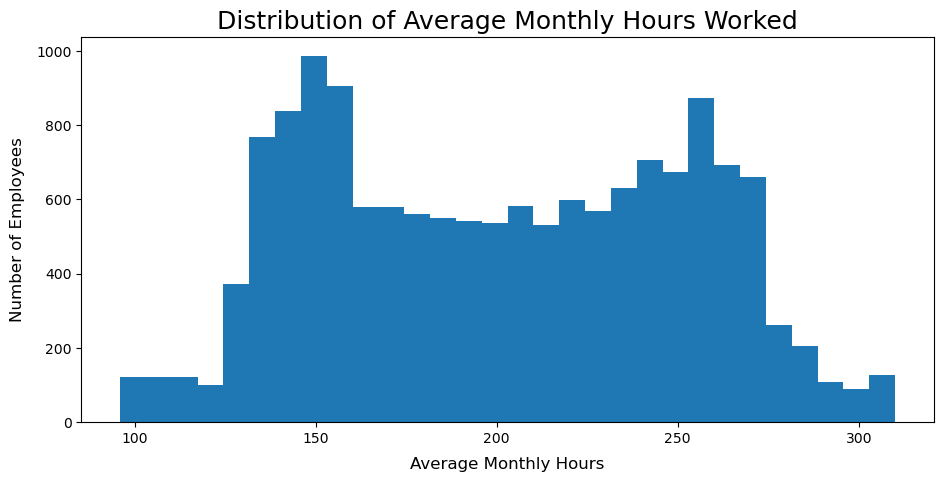

In [21]:
#histogram of average_monthly_hours_worked
plt.figure(figsize=[11,5]) #Sets the image size
bins=30

plt.hist(x=df.average_montly_hours, bins=bins)

tick_values = np.arange(0, 1.1, 0.1)

plt.title ('Distribution of Average Monthly Hours Worked', fontsize=18)
plt.xlabel ('Average Monthly Hours', labelpad=8, fontsize=12)
plt.ylabel ('Number of Employees', labelpad=8, fontsize=12)

plt.show()

There are two peaks observed. One peak lies in the range of 150-200 hours, and the other peak is in the 250-300 hours range. This suggests that there are two distinct groups pf employees based on their working hours.

### How does the commute time vary across the dataset?

In [22]:
#Set default palette color
default_color = sns.color_palette()[0]

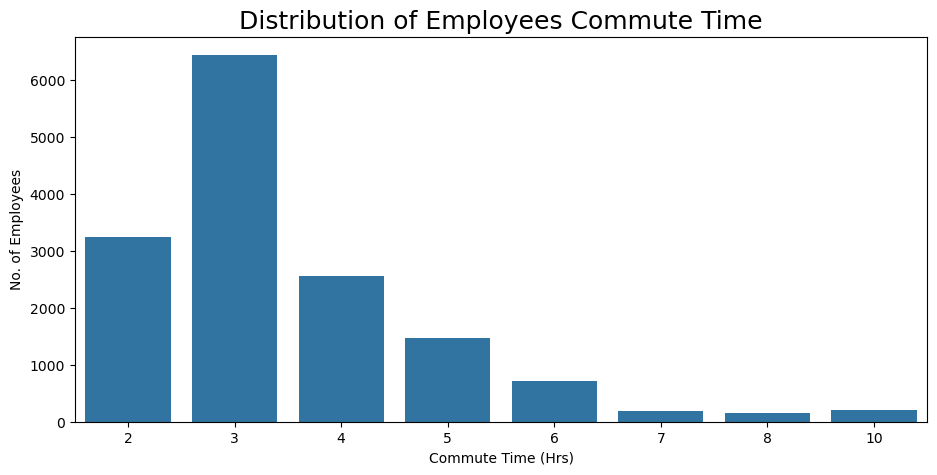

In [23]:
plt.figure(figsize=[11,5])
sns.countplot(x=df.Commute_time, color=default_color)

plt.title ('Distribution of Employees Commute Time', fontsize=18)
plt.xlabel ("Commute Time (Hrs)")
plt.ylabel ("No. of Employees")
plt.show()                         

Most of the employees spend 2-4 hours commuting to work. However, a significant number also spend 6-10 hours, which is a lot of travel.

### What is the distribution of employees across each department?

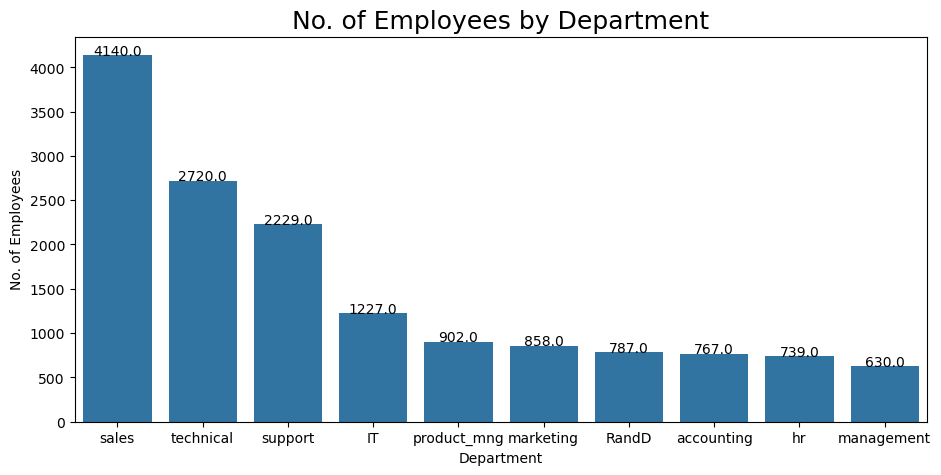

In [24]:
plt.figure(figsize=[11,5])
ax = sns.countplot(x=df.Department, color=default_color, order=df['Department'].value_counts().index)

#Add data labels (counts) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title ('No. of Employees by Department', fontsize=18)
plt.xlabel ("Department")
plt.ylabel ("No. of Employees")
plt.show() 

The sales team have the highest number of employees, while the management team has the least employees.

In [25]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

### What is the distribution of Employees Salary?

In [26]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [27]:
df['salary'].value_counts()/ len(df)

salary
low       0.487766
medium    0.429762
high      0.082472
Name: count, dtype: float64

In [28]:
len(df)

14999

In [29]:
df['salary'].value_counts()/ len(df) *100

salary
low       48.776585
medium    42.976198
high       8.247216
Name: count, dtype: float64

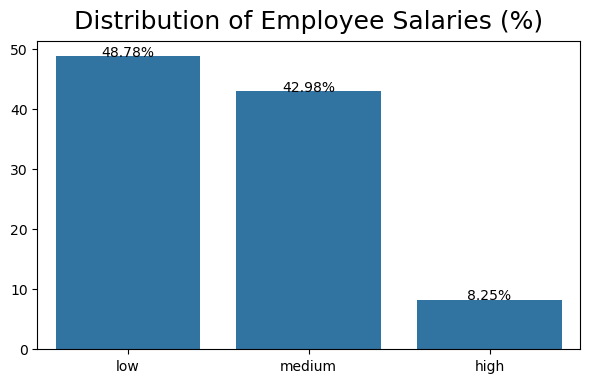

In [30]:
plt.figure(figsize=[7,4])
#Calculate the percentage distribution of salaries
salary_percentages = (df['salary'].value_counts() / len(df)) * 100

ax = sns.barplot(x=salary_percentages.index, y=salary_percentages, color=default_color, order=salary_percentages.index)

#Add data labels (counts) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title ('Distribution of Employee Salaries (%)', fontsize=18, y=1.015)
plt.xlabel ("")
plt.ylabel ("")
plt.show() 

Only 8.25% of employees earn high salaries. 48.7% earn low salaries and 42.9% earn medium salaries.

### What is the distribution of employees that got promoted in the last 5 years?

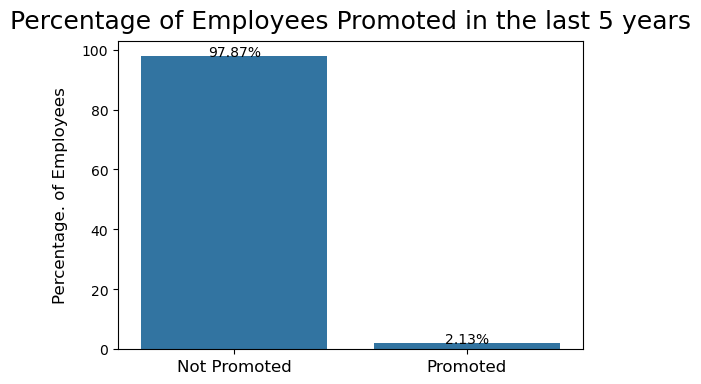

In [31]:
plt.figure(figsize=[6,4])
promotion_pct = (df['promotion_last_5years'].value_counts() / len(df)) *100

#Create a countplot with percentage data
ax = sns.barplot(x=promotion_pct.index, y=promotion_pct, color=default_color, order=promotion_pct.index)

#Add data labels (percentage) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
#Set y-axis labels and title
plt.xticks(ticks=[0,1], labels=['Not Promoted', 'Promoted'], fontsize=12)
plt.title ('Percentage of Employees Promoted in the last 5 years', fontsize=18, y=1.015)
plt.xlabel ('')
plt.ylabel ('Percentage. of Employees', labelpad=10, fontsize=12)
plt.show() 

Only 2% of employees were promoted in the last 5 years, which is quite low and indicates that there is very little room for career growth within the company.

### What is the distribution of employees that were trained in the last years?

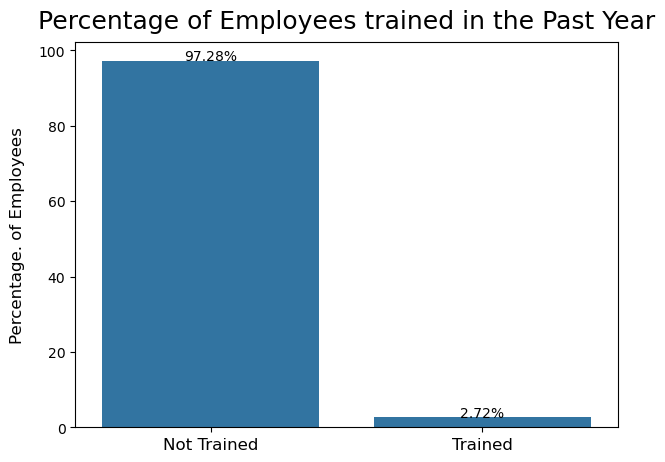

In [32]:
plt.figure(figsize=[7,5])
trained_pct = (df['Training_Last_Year'].value_counts() / len(df)) *100

#Create a countplot with percentage data
ax = sns.barplot(x=trained_pct.index, y=trained_pct, color=default_color, order=trained_pct.index)

#Add data labels (percentage) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
#Set y-axis labels and title
plt.xticks(ticks=[0,1], labels=['Not Trained', 'Trained'], fontsize=12)
plt.title ('Percentage of Employees trained in the Past Year', fontsize=18, y=1.015)
plt.xlabel ('')
plt.ylabel ('Percentage. of Employees', labelpad=10, fontsize=12)
plt.show() 

Only 2.7% of employees were trained in the past year.

### What percentage of employees were involved in a work accident?

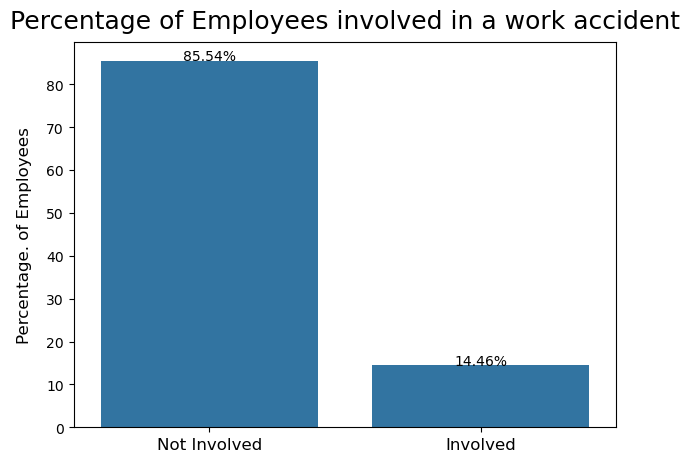

In [33]:
plt.figure(figsize=[7,5])
accident_pct = (df['Work_accident'].value_counts() / len(df)) *100

#Create a countplot with percentage data
ax = sns.barplot(x=accident_pct.index, y=accident_pct, color=default_color, order=accident_pct.index)

#Add data labels (percentage) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
#Set y-axis labels and title
plt.xticks(ticks=[0,1], labels=['Not Involved', 'Involved'], fontsize=12)
plt.title ('Percentage of Employees involved in a work accident', fontsize=18, y=1.015)
plt.xlabel ('')
plt.ylabel ('Percentage. of Employees', labelpad=10, fontsize=12)
plt.show() 

Approximately 14.6% of the workforce had a work accident during their tenure.

### What is the percentage of employees turnover in the last 2 years?

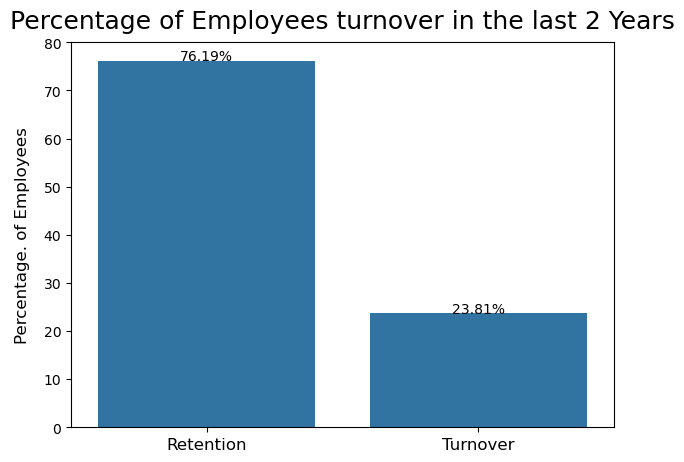

In [34]:
plt.figure(figsize=[7,5])
left_pct = (df['left'].value_counts() / len(df)) *100

#Create a countplot with percentage data
ax = sns.barplot(x=left_pct.index, y=left_pct, color=default_color, order=left_pct.index)

#Add data labels (percentage) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
#Set y-axis labels and title
plt.xticks(ticks=[0,1], labels=['Retention', 'Turnover'], fontsize=12)
plt.title ('Percentage of Employees turnover in the last 2 Years', fontsize=18, y=1.015)
plt.xlabel ('')
plt.ylabel ('Percentage. of Employees', labelpad=10, fontsize=12)
plt.show() 

Approximately 23.8% of the workforce left the company.

## Bivariate Exploration

We will use bivariate analysis to identify the factors that most influence employee retention Our target variables include satisfaction_level, last_evaluation, number_project, average_montly_hours, promotion_last_5years etc. 

We will examine how each variable relates to the target variable. We will do this by answering the following questions:

* Which department has the highest number of employees leaving the company?
* Do employees with higher salaries tend to stay longer? Is there a relationship between salary and employee retention?
*  Is there a correlation between employee satisfaction levels and their retention within the organization?
*  How do the performance evolution scores differ between employees who leave and those who stay?
*  Do employees who work on more projects have higher turnover rates?
*  Do employees who work longer hours have higher turnover rates?
*  How does commute time affect employee retention?
*  Do work accidents lead to employees leaving the company?
*  Are employees who are promoted more or less likely to stay with the company?
*  How many employees who we were trained in the past year decided to remain with the company?


### 1. Which department has the highest employee turnover and retention rate?

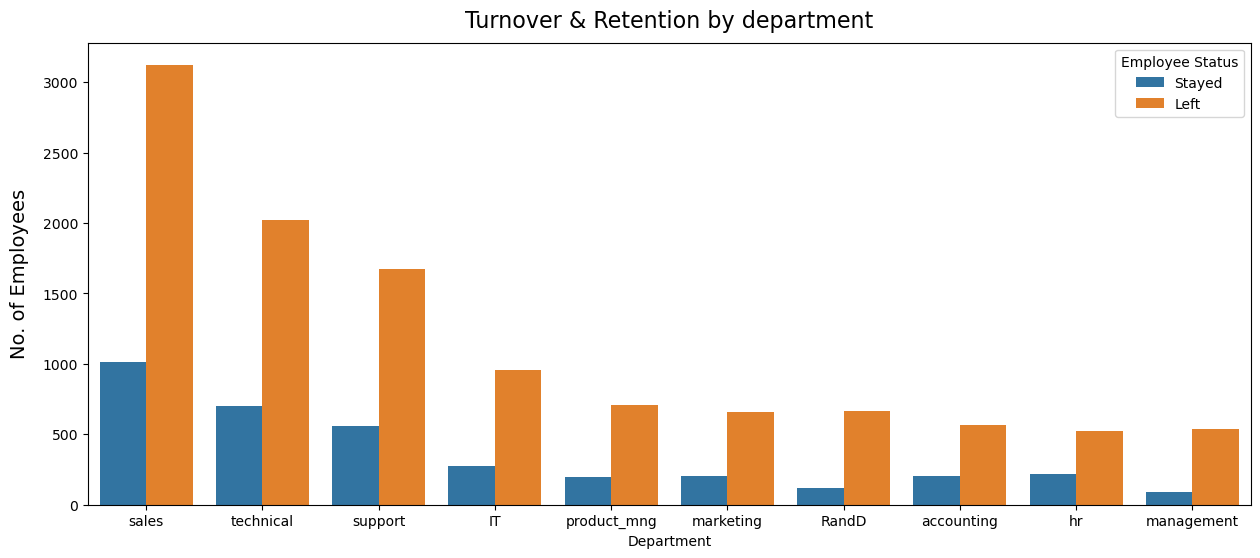

In [35]:
#Convert Columns to Appropriate Data Types
df['left'] = df['left'].astype(str)
df['salary'] = df['salary'].astype('category')

#Plot the chart
plt.figure(figsize=[15,6])
sns.countplot(data=df, x=df['Department'], hue='left', order=df['Department'].value_counts().index)
plt.title ('Turnover & Retention by department', fontsize=16, y=1.015)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee Status', labels=['Stayed', 'Left'])

plt.show();

Sales, Technical and Support team have the highest number of employees leaving the company. Management has the least number of employees leaving the company.

### 2. Do employees with higher salaries tend to stay longer? Is there a relationship between salary and employee retention?

In [38]:
df['left'] = df['left'].astype(str)

C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


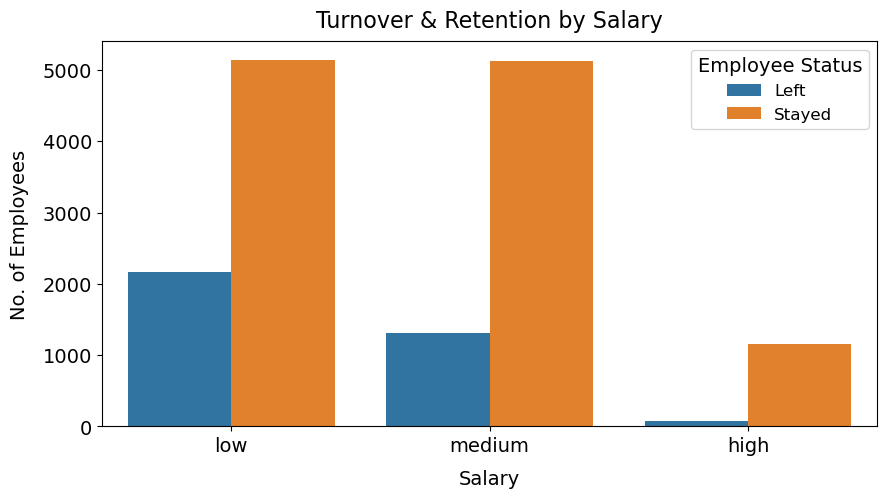

In [37]:
#Correcting the adjustment of the y-axis ticks
plt.figure(figsize=[10,5])
ax=sns.countplot(data=df, x='salary', hue='left', order=df['salary'].value_counts().index)
plt.title ('Turnover & Retention by Salary', fontsize=16, y=1.015)
plt.xlabel ('Salary', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)

#Set the tick labels size correctly
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.legend (title='Employee Status', labels=['Left', 'Stayed'], fontsize=12, title_fontsize=14)
plt.show();

Employees with higher salaries tend to stay longer with the organization. Employees with lower salaries are more likely to leave the organization.

### 3. Is there a correlation between employee satisfaction levels and their retention within the organization?

In [ ]:
plt.figure(figsize=[10,5])
sns.histplot(data=df, x='satisfaction_level', hue='left')
plt.title ('Turnover & Retention by satisfaction level', fontsize=15, y=1.015)
plt.xlabel ('satisfaction_level', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee Status', labels=['Stayed', 'Left'], fontsize=12, title_fontsize=12)

plt.show();

* There is a noticeable cluster of employees who left the company at the lower end of the satisfaction scale, indicating that lower satisfaction levels are associated with higher turnover.
* Employees who have stayed with the company tend to have a wider distribution of satisfaction levels, but with a concentration towards then higher end of the scale.
* There is a so a smaller peak of employees who left at high satisfaction levels, which might suggest that some other factors beyond satisfaction are influencing the decision to leave.

We will segment the satisfaction scores into groups to properly visualize the trend.
* Very Dissatisfied: 1-25%
* Dissatisfied: 25-50%
* Neutral: 51-60%
* Satisfied: 61-80%
* Very Satisfied: 81-100%

In [40]:
#Define the bins for satisfaction levels
bins = [0, 0.25, 0.50, 0.60, 0.80, 1.0]
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

#Create a new column 'Satisfaction Level' by cutting the 'satsfaction_level' into bins
df['Satisfaction Level'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels, include_lowest=True)

In [39]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Department,salary,Training_Last_Year
0,EMP02438,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,EMP28133,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,EMP07164,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,EMP30478,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,EMP24003,0.37,0.52,2,159,3,0,1,0,sales,low,0


C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


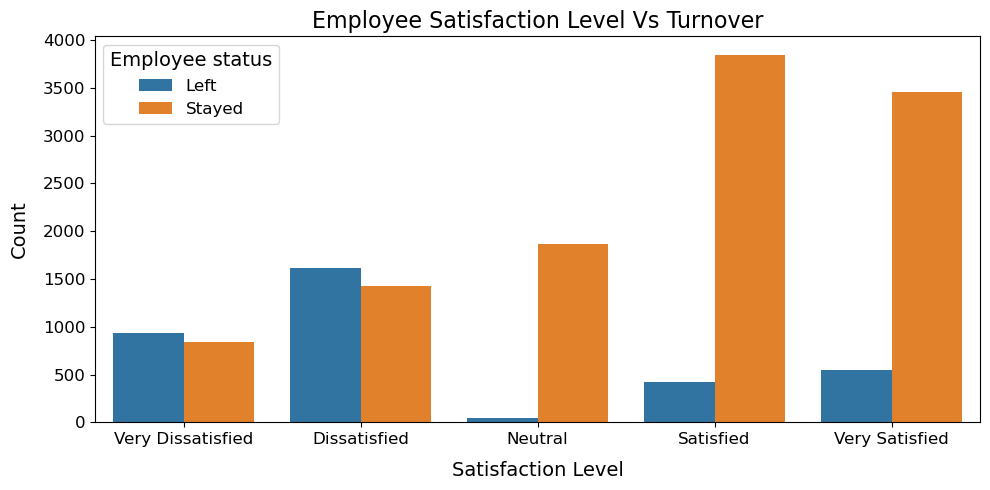

In [41]:
#Visualize the result using a countplot with 'left' as the hue
plt.figure(figsize=[10,5])
ax=sns.countplot(data=df, x='Satisfaction Level', hue='left')
plt.title ('Employee Satisfaction Level Vs Turnover', fontsize=16)
plt.xlabel ('Satisfaction Level', labelpad=10, fontsize=14)
plt.ylabel ('Count', labelpad=10, fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.legend (title='Employee status', labels=['Left', 'Stayed'], fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show();

* There is a substantial number of employees who left the company in the **Very Dissatisfied** and **Dissatisfied** categories, suggesting a strong link betweenlow satisfaction levels and high turnover.
* The **Neutral** category shows a smaller, yet significant number of employees leaving, which could imply that even a lack of strong positive or negative feelings can be associated with turnover.
* The **Satisfied** and **Very Satisfied** categories have higher counts of employees who stayed, which supports the idea that higher satisfaction correlates with better retention. However, there are still employees who left the company despite being in the **Satisfied** and **Very Satisfied** categories, indicating that satisfaction is nit the sole factor in an employee's decision to stay or leave.

In [42]:
df[df['satisfaction_level'] <=0.5]

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Department,salary,Training_Last_Year,Satisfaction Level
0,EMP02438,0.38,0.53,2,157,3,0,1,0,sales,low,0,Dissatisfied
2,EMP07164,0.11,0.88,7,272,4,0,1,0,sales,medium,0,Very Dissatisfied
4,EMP24003,0.37,0.52,2,159,3,0,1,0,sales,low,0,Dissatisfied
5,EMP08609,0.41,0.50,2,153,3,0,1,0,sales,low,0,Dissatisfied
6,EMP14345,0.10,0.77,6,247,4,0,1,0,sales,low,0,Very Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,EMP40221,0.40,0.57,2,151,3,0,1,0,support,low,0,Dissatisfied
14995,EMP24196,0.37,0.48,2,160,3,0,1,0,support,low,0,Dissatisfied
14996,EMP33544,0.37,0.53,2,143,3,0,1,0,support,low,0,Dissatisfied
14997,EMP40533,0.11,0.96,6,280,4,0,1,0,support,low,0,Very Dissatisfied


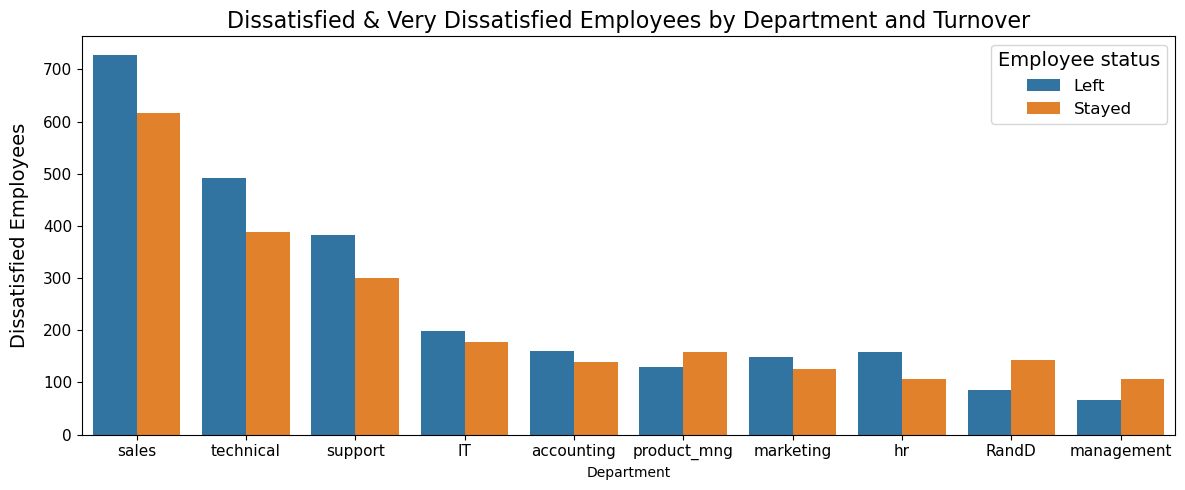

In [44]:
#Select dissatisfied employees
dissatisfied_employees = df[df['satisfaction_level'] <=0.5]

#Visualize the count of dissatisfied & very dissatisfied employees by department with 'left' as the hue
plt.figure(figsize=[12,5])
ax=sns.countplot(data=dissatisfied_employees, x='Department', hue='left', order=dissatisfied_employees['Department'].value_counts().index)

plt.title ('Dissatisfied & Very Dissatisfied Employees by Department and Turnover', fontsize=16)
plt.ylabel ('Dissatisfied Employees', labelpad=10, fontsize=14)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.legend (title='Employee status', labels=['Left', 'Stayed'], fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show();

The sales, technical and support departments are the top 3 departments with the most number of dissatisfied employees and more than half of these employees have left the company.

### 4. How do the performance evaluation scores differ between employees who leave and those who stay?

C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


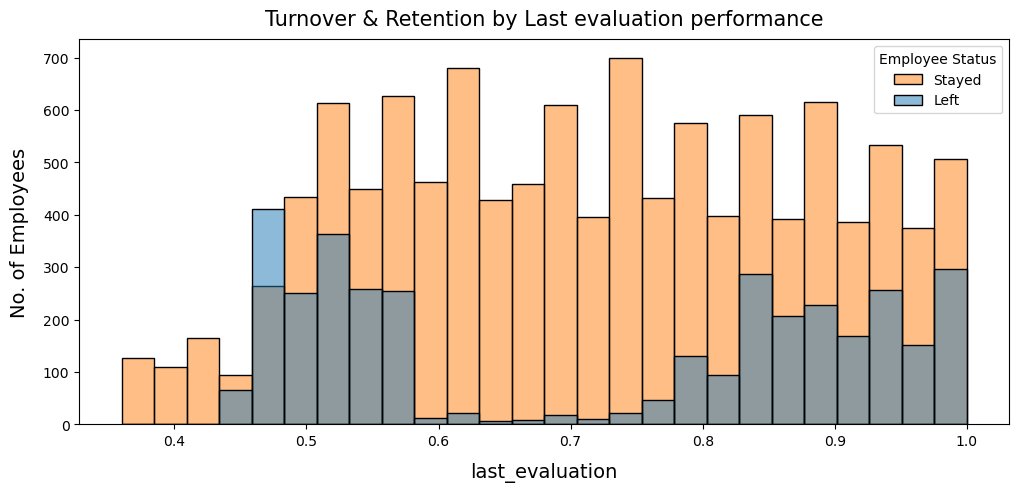

In [43]:
plt.figure(figsize=[12,5])
sns.histplot(data=df, x='last_evaluation', hue='left')
plt.title ('Turnover & Retention by Last evaluation performance', fontsize=15, y=1.015)
plt.xlabel ('last_evaluation', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee Status', labels=['Stayed', 'Left'])

plt.show();

From the histogram, we can observe

* A bimodal distribution of employees who left, with peaks around scores of 0.45 and 0.9. This suggests that both low-performing and high-performing employees are leaving the company.
* There is a significant number of employees who left with high evaluation scores, which could indicate that even high performers are at risk of turnover. 

### 5. Do employees who work on more projects have higher turnover rates?

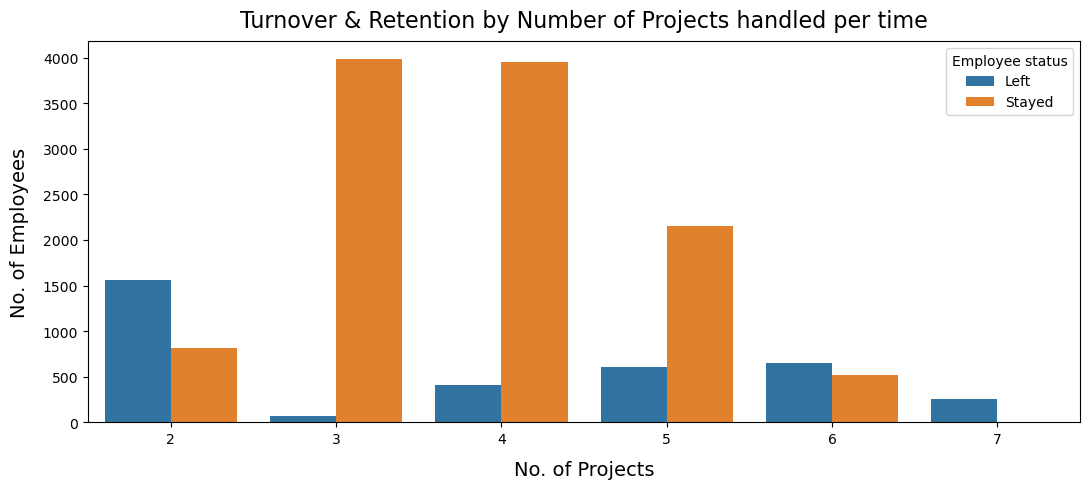

In [49]:
plt.figure(figsize=[11,5])
sns.countplot(data=df, x='number_project', hue='left')
plt.title ('Turnover & Retention by Number of Projects handled per time', fontsize=16, y=1.015)
plt.xlabel ('No. of Projects', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee status', labels=['Left', 'Stayed'])
plt.tight_layout()
plt.show();

* Employees who have managed 3 projects have the best retention rates and a lower turnover rate compared to those with more or fewer projects.
* High turnover is seen among employees handling 6 or 7 projects, suggesting that too much work might lead to burnout.
* Employees with at most 2 projects also tend to leave more, possibly due to feeling underutilized or unengaged.
*  Employees handling 3 to 5 projects show mixed results, hinting that there might be an ideal number of projects that keep them engaged without causing burnout.


### 6. Do employees who work longer hours have higher turnover rates?

C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


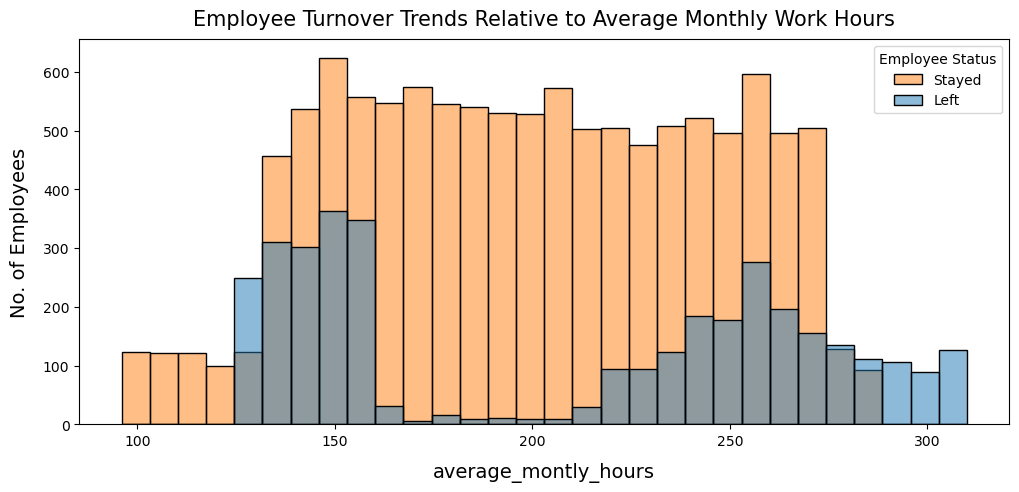

In [51]:
plt.figure(figsize=[12,5])
sns.histplot(data=df, x='average_montly_hours', hue='left')
plt.title ('Employee Turnover Trends Relative to Average Monthly Work Hours', fontsize=15, y=1.015)
plt.xlabel ('average_montly_hours', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee Status', labels=['Stayed', 'Left'])

plt.show();

* There are two main reasons why employees leave the company. One is for those working less than 160 hours, which might mean they are unhappy with part-time work. The other is for those working more than 200 hours, which could be due to stress or not enough work-life balance.
* 	Employees who stay tend to have a more balanced number of work hours, usually around medium hours. This suggests that a balanced workload helps employees stay.


### 7. How does commute time affect employee retention?

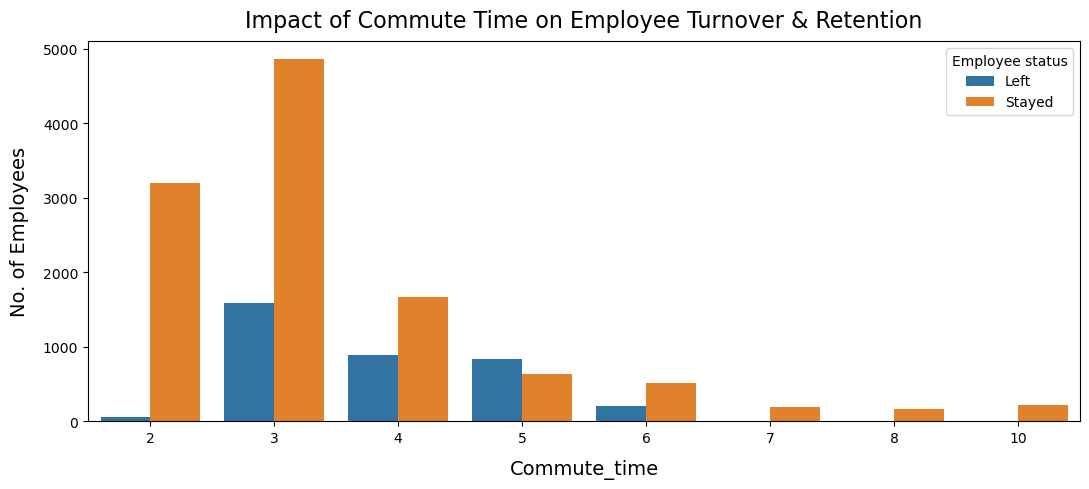

In [52]:
plt.figure(figsize=[11,5])
sns.countplot(data=df, x='Commute_time', hue='left')
plt.title ('Impact of Commute Time on Employee Turnover & Retention', fontsize=16, y=1.015)
plt.xlabel ('Commute_time', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee status', labels=['Left', 'Stayed'])
plt.tight_layout()
plt.show();

From the visualization, we can interpret the following:
* Employees with shorter commute times (2hrs) tend to stay with the company. As commute times increase, more employees leave. This suggests long commutes might make people quit.
* Surprisingly, some employees with seven to ten hours of commuting still stay with the company.


In [53]:
df[df['Commute_time'] >=7]

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,Commute_time,Work_accident,left,promotion_last_5years,Department,salary,Training_Last_Year,Satisfaction Level
11007,EMP13636,0.49,0.67,2,190,8,0,0,0,marketing,medium,0,Dissatisfied
11008,EMP07335,0.92,0.99,3,176,8,0,0,0,sales,medium,0,Very Satisfied
11009,EMP42125,0.81,0.55,4,217,8,0,0,0,accounting,medium,0,Very Satisfied
11010,EMP20847,0.62,0.91,3,269,8,0,0,0,support,medium,0,Satisfied
11011,EMP08357,0.21,0.70,3,238,8,0,0,0,technical,medium,0,Very Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14205,EMP22493,0.22,0.94,3,193,10,0,0,1,management,high,1,Very Dissatisfied
14206,EMP34601,0.90,0.55,3,259,10,1,0,1,management,high,1,Very Satisfied
14207,EMP20672,0.74,0.95,5,266,10,0,0,1,management,high,1,Satisfied
14208,EMP23944,0.85,0.54,3,185,10,0,0,1,management,high,1,Very Satisfied


#### Now let's look at commute times of employees by department

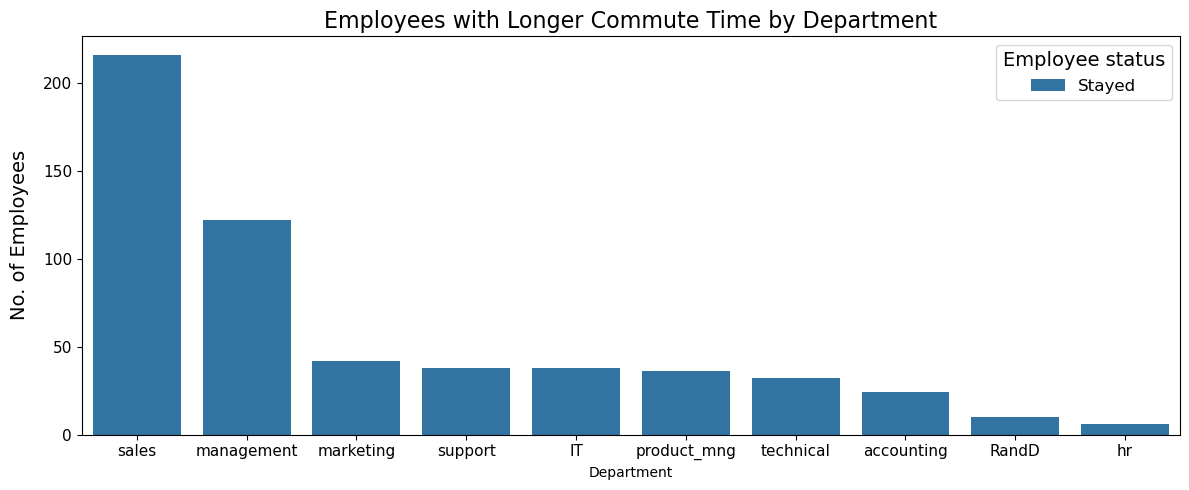

In [55]:
#Select employees with longer commute time
Longer_commute = df[df['Commute_time'] >=7]

#Visualize the count of the employees by department with "left' as the hue
plt.figure(figsize=[12,5])
ax=sns.countplot(data=Longer_commute, x='Department', hue='left', order=Longer_commute['Department'].value_counts().index)

plt.title ('Employees with Longer Commute Time by Department', fontsize=16)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.legend (title='Employee status', labels=['Stayed', 'Left'], fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show();

#### Let's look at employees with longer commute time by salary

C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ndibe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


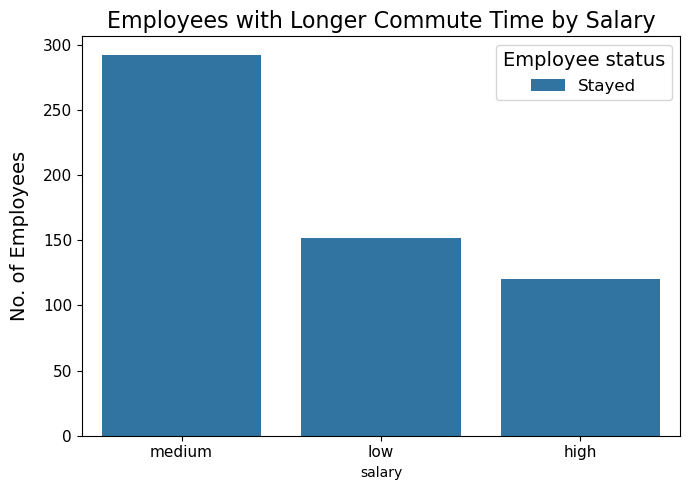

In [58]:
plt.figure(figsize=[7,5])
ax=sns.countplot(data=Longer_commute, x='salary', hue='left', order=Longer_commute['salary'].value_counts().index)

plt.title ('Employees with Longer Commute Time by Salary', fontsize=16)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.legend (title='Employee status', labels=['Stayed', 'Left'], fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show();

### 8. Do work accidents lead to employees leaving the company?

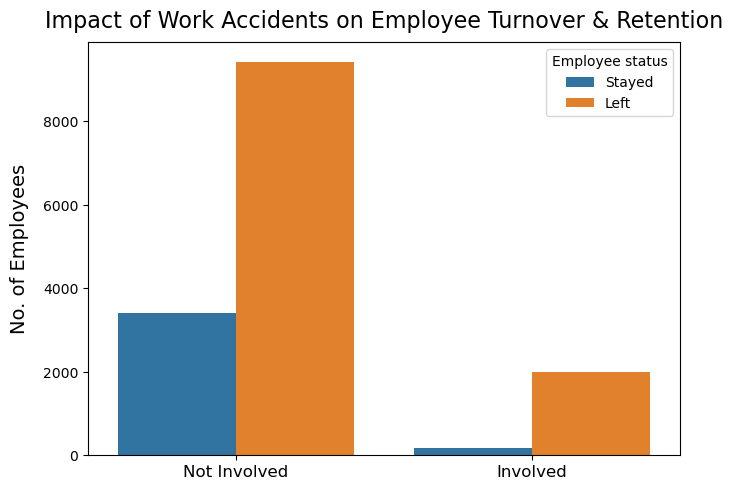

In [71]:
plt.figure(figsize=[7,5])
sns.countplot(data=df, x='Work_accident', hue='left')
plt.xticks(ticks=[0,1], labels=['Not Involved', 'Involved'], fontsize=12)
plt.title ('Impact of Work Accidents on Employee Turnover & Retention', fontsize=16, y=1.015)
plt.xlabel ('', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee status', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show();

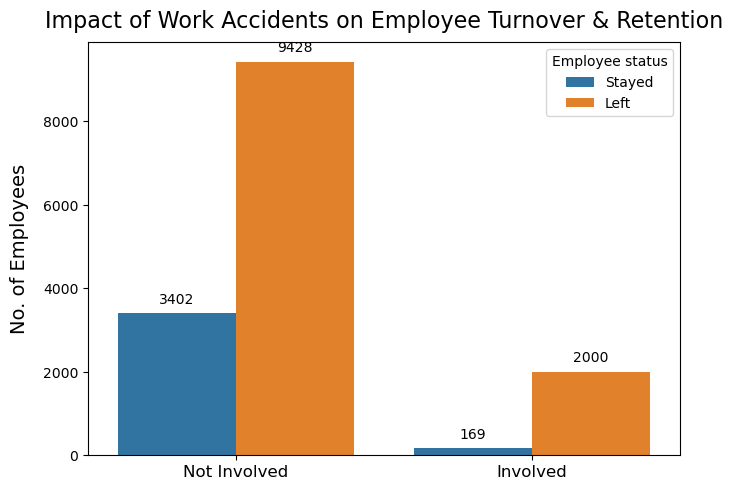

In [72]:
plt.figure(figsize=[7,5])
ax = sns.countplot(data=df, x='Work_accident', hue='left')

plt.xticks(ticks=[0,1], labels=['Not Involved', 'Involved'], fontsize=12)
plt.title ('Impact of Work Accidents on Employee Turnover & Retention', fontsize=16, y=1.015)
plt.xlabel ('', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee status', labels=['Stayed', 'Left'])

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

The number of employees who left after being involved in a work accident, is relatively small compared to those who were not involved in accidents.This suggests that work accidents are not a major contributing factor to employees leaving the company.

### 9. Are employees who are promoted more or less likely to stay with the company?

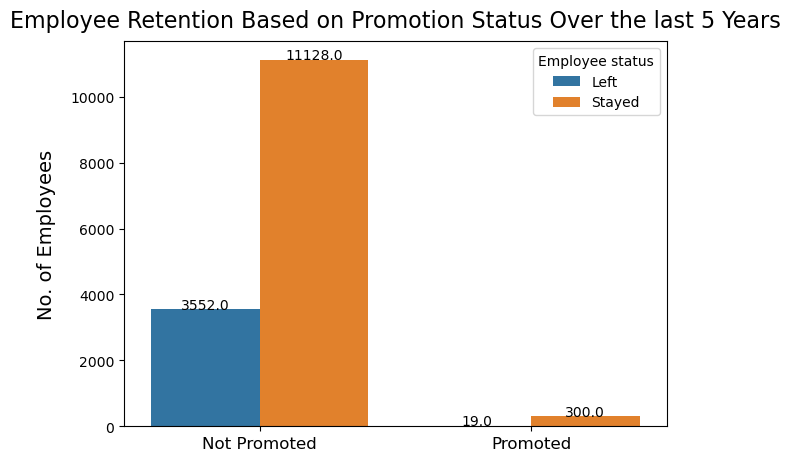

In [70]:
plt.figure(figsize=[7,5])
ax = sns.countplot(data=df, x='promotion_last_5years', hue='left')
plt.xticks(ticks=[0,1], labels=['Not Promoted', 'Promoted'], fontsize=12)
plt.title ('Employee Retention Based on Promotion Status Over the last 5 Years', fontsize=16, y=1.015)
plt.xlabel ('', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee status', labels=['Left', 'Stayed'])

#Add data labels (counts) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

* Promotions over the past five years have been infrequent.Only 2% of the workforce has been promoted within the last five years.
* Majority of employees who received promotions in the last five years have remained with the company.The number of promoted employees who stayed is visibly higher than the number of those who left.
* This suggests that promotions may contribute positively to employee retention, as those who were promoted are not leaving in large numbers, like the not promoted employees. 


### 10. How many employees who were trained in the past year decided to remain with the company?

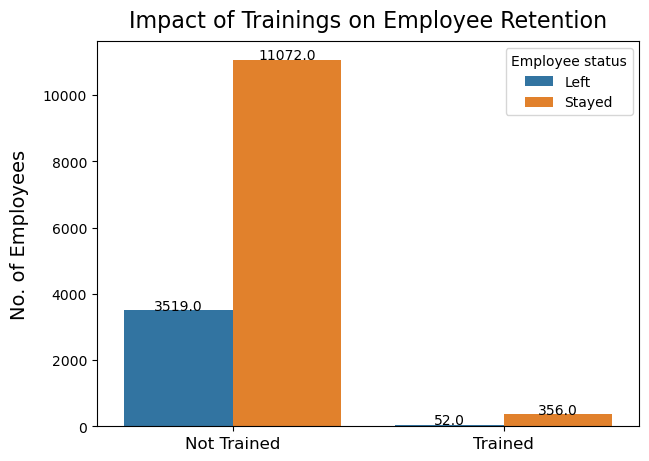

In [69]:
plt.figure(figsize=[7,5])
ax = sns.countplot(data=df, x='Training_Last_Year', hue='left')
plt.xticks(ticks=[0,1], labels=['Not Trained', 'Trained'], fontsize=12)
plt.title ('Impact of Trainings on Employee Retention', fontsize=16, y=1.015)
plt.xlabel ('', labelpad=10, fontsize=14)
plt.ylabel ('No. of Employees', labelpad=10, fontsize=14)
plt.legend (title='Employee status', labels=['Left', 'Stayed'])

#Add data labels (counts) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.show()

## Conclusion

Based on the comprehensive analysis of  employee turnover and retention at Neotech Corporation, the following conclusions can be drawn:.

1. **Employee Satisfaction:** Overall employee satisfaction is moderate. However, there is a concerning number of highly dissatisfied employees. This suggests that there are systemic issues within the company that need to be addressed.
2. **Performance Evaluations:** Both low and high-performing employees are leaving, indicating that performance is not the sole factor in retention. Other factors, such as commute times, salary levels, and career development opportunities, play a significant role.
3. **Commute Times:** Longer commutes correlate with higher turnover. However, there are exceptions for those with extremely long commutes, indicating other factors at play in retention.
4. **Salary Levels:** Higher salaries are associated with better retention, while lower salaries increase the likelihood of turnover.
5. **Promotions and Training:** Infrequent promotions and training opportunities contribute to turnover. Employees who receive promotions or training tend to stay, suggesting these are valued aspects of career development.
6. **Lack of Career Growth:** Employees who see few opportunities for advancement are more likely to leave.
7. **Departmental Turnover:** Sales, technical, and support departments experienced the highest turnover, particularly among dissatisfied employees. This may highlight specific areas for improvement.
8. **Work Accidents:** Work accidents do not seem to be a significant factor in employee turnover. However, a number of employees have been involved in work accidents.
9. **Workload:** Both underutilization and overutilization contribute to turnover. Employees who have a balanced workload and work-life balance are more likely to stay with the company. Quite a number of employees work more than 200 hours monthly. Employees who are overworked or overcommitted are more likely to leave.


## Recommendations

1. **Address Satisfaction Issues:** Implement regular assessments to identify and address the root causes of dissatisfaction, such as high workloads, lack of career growth, and lack of training, particularly in the departments with the highest turnover.
2. **Review Workload Management:** Ensure employees are neither overburdened nor underutilized. Ensure that employees are not working on more than three to four projects at a time to maintain engagement without causing burnout.
3. **Enhance Career Development Opportunities:** Increase the frequency of promotions and training to signal a clear pathway for career growth, which is likely to improve retention. Employees should be able to see a path for advancement within the company.
4. **Adjust Salary Structures:** Review and adjust salaries, especially for those at the lower end, to improve satisfaction and reduce turnover.
5. **Flexible Work Arrangements:** Consider flexible working arrangements or remote/hybrid work options to alleviate the strain of long commutes.
6. **Focus on High Performers:** Develop retention strategies specifically for high performers, who show a surprising tendency to leave.
7. **Department-Specific Strategies:** Sales, technical, and support departments require targeted strategies to improve employee satisfaction and reduce turnover, as they have the highest number of leaving employees.
8. **Comprehensive Engagement Plan:** Develop a comprehensive engagement plan that addresses various aspects like work-life balance, recognition, and employee well-being.
9. **Recognize and Reward Employees:** Employees should feel that their hard work and contributions are appreciated. This can be done by providing regular feedback, offering recognition and rewards, and creating a culture of appreciation.

By addressing these key areas, Neotech Corporation can aim to reduce turnover rates, enhance employee satisfaction, and foster a work environment that supports employee retention and growth.